In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

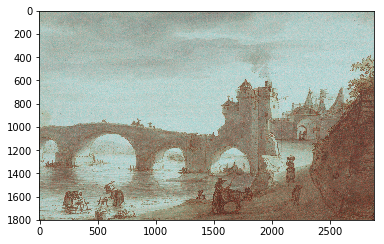

In [2]:
I = np.array(Image.open('image.png'))
plt.imshow(I)

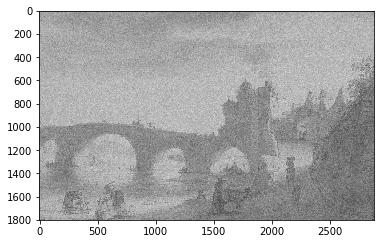

In [56]:
R = I[:, :, 0]
G = I[:, :, 1]
B = I[:, :, 2]
plt.imshow(R, cmap='gray')

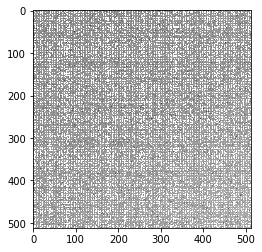

In [77]:
z = np.fft.fft2(R)
q = np.fft.fftshift(z)

N = 512
m = np.log(np.abs(q))[:N, :N] # magnitude_q
# m = np.log(np.abs(q))[:-N, :-N] # magnitude_q
m_scaled = np.uint8(255 * (m - m.min()) / (m.max() - m.min()))
plt.imshow(m_scaled, cmap='gray')

In [6]:
def reverse_bits_pas_shift(v):
    v = ((v >>  1) & 0x55555555) | ((v & 0x55555555) <<  1) # swap odd and even bits
    v = ((v >>  2) & 0x33333333) | ((v & 0x33333333) <<  2) # swap consecutive pairs
    v = ((v >>  4) & 0x0F0F0F0F) | ((v & 0x0F0F0F0F) <<  4) # swap nibbles ... 
    v = ((v >>  8) & 0x00FF00FF) | ((v & 0x00FF00FF) <<  8) # swap bytes
    v = ( v >> 16              ) | ( v               << 16) # swap 2-byte long pairs
    return v >> 23

In [7]:
N = 512

In [8]:
reversed_image = np.zeros((N, N))
for i in range(reversed_image.shape[0]):
    for j in range(reversed_image.shape[1]):
        i_new = reverse_bits_pas_shift(i)
        j_new = reverse_bits_pas_shift(j)
        reversed_image[i_new, j_new] = m[i, j];

NameError: name 'm' is not defined

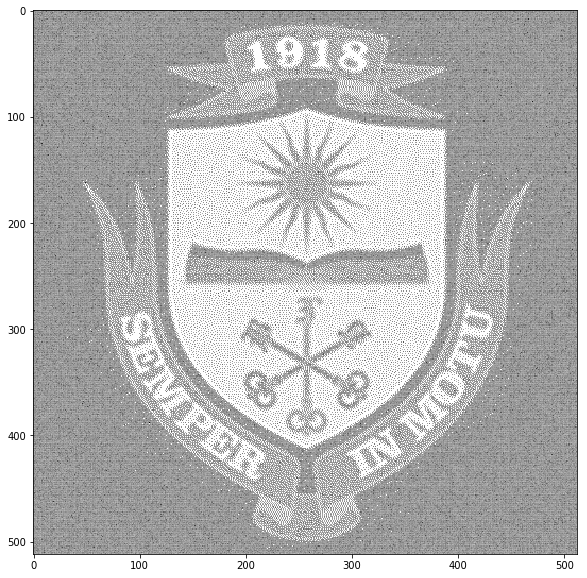

In [81]:
fig = plt.figure(figsize=(10, 10))                                                              
ax = fig.add_subplot(1,1,1)
plt.imshow(reversed_image,cmap='gray')